# Salient synchronous machine with damper winding

Jupyter notenook for the simulation of a salient synchronous machine with a damper winding.

This notebook is an additional file to exercise 06.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import ode
from scipy.integrate import odeint

# plot configurations
cm = 1/2.54 # centimeters in inches

# define colors
blue = np.array([0.000, 0.447, 0.741])
red = np.array([0.850, 0.325, 0.098])
yellow = np.array([0.929, 0.694, 0.125])
purple = np.array([0.494, 0.184, 0.556])
green = np.array([0.466, 0.674, 0.188])
lblue = np.array([0.301, 0.745, 0.933])
dred = np.array([0.635, 0.078, 0.184])

In [2]:
## machine parameter
R_s = 0.0166    # ohm
R_f = 54.7      # ohm
L_d = 2.7e-3    # H
L_q = 1.3e-3    # H
L_f = 20.3      # H
M_fs = 92.8e-3  # H

# damping winding
M_dD = 2e-3  # H
M_qQ = 1e-3  # H
M_fr = 50e-3 # H

L_D = 3e-3  # H
L_Q = 2e-3  # H

R_rD = 50e-3 # ohm
R_rQ = 30e-3 # ohm

# assumption
p = 2
J = 0.02

gamma = M_fs**2-L_d*L_f

In [3]:
## simulation configuration

# time vector
t = np.linspace(0,0.5,10**3)

## short circuit
# stator
u_sd = 0 # V
u_sq = 0 # V

# rotor 
u_rD = 0 # V
u_rQ = 0 # V

# damping winding
u_f = 0 # V

In [4]:
def odes(x,t):
    # states
    i_sd = x[0]
    i_sq = x[1]
    i_f = x[2]
    i_rD = x[3]
    i_rQ = x[4]
    omega = x[5]
    angle = x[6]

    
    L = np.array([[L_d,0,M_fs,M_dD,0],[0,L_q,0,0,M_qQ],[M_fs,0,L_f,M_fr,0],[M_dD,0,M_fr,L_D,0],[0,M_qQ,0,0,L_Q]])
    inf_L = np.linalg.inv(L)

    u = np.array([[u_sd],[u_sq],[u_f],[u_rD],[u_rQ]])
    R = np.array([[R_s,0,0,0,0],[0,R_s,0,0,0],[0,0,R_f,0,0],[0,0,0,R_rD,0],[0,0,0,0,R_rQ]])
    i = np.array([[x[0]],[x[1]],[x[2]],[x[3]],[x[4]]])
    omega_m = np.array([[0,-omega,0,0,0],[omega,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]])

    psi = np.matmul(L,i)

    d_x_dt = np.matmul(inf_L,(u-np.matmul(R,i) - np.matmul(omega_m,psi)))

    d_i_sd_dt = d_x_dt[0]
    d_i_sq_dt = d_x_dt[1]
    d_i_f_dt = d_x_dt[2]
    d_i_rD_dt = d_x_dt[3]
    d_i_rQ_dt = d_x_dt[4]

    # mechanical
    d_omega_dt = p/J *(3/2*p*(M_fs*i_f*i_sq + (L_d-L_q)*i_sq*i_sd + M_dD*i_sq*i_rD-M_qQ*i_sd*i_rQ) - 0.0001*omega**2)

    # angle
    d_angle_dt = omega

    return[d_i_sd_dt,d_i_sq_dt,d_i_f_dt,d_i_rD_dt,d_i_rQ_dt,d_omega_dt,d_angle_dt]

In [5]:
# set the initial conditions
i_sd0 = 0
i_sq0 = 0
i_f0 = 7.854 # A
i_rD0 = 0
i_rQ0 = 0
omega_M0 = 200/p*2*np.pi
epsilon_M0 = 0

x0 = [i_sd0,i_sq0,i_f0,i_rD0,i_rQ0,omega_M0,epsilon_M0]

## solve ODE
x = odeint(odes,x0,t)

i_d = x[:,0]
i_q = x[:,1]
i_f = x[:,2]
i_rD = x[:,3]
i_rQ = x[:,4]
omega = x[:,5]
angle = x[:,6]

# torque
T = 3/2*p*(M_fs*i_f*i_q + (L_d-L_q)*i_q*i_d + M_dD*i_q*i_rD-M_qQ*i_d*i_rQ)

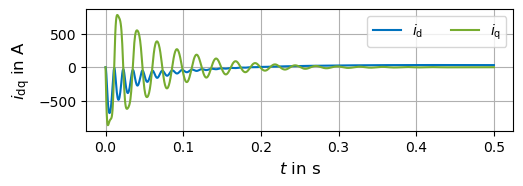

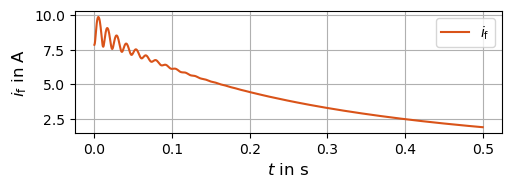

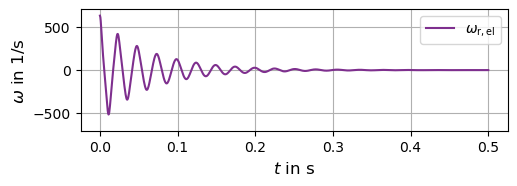

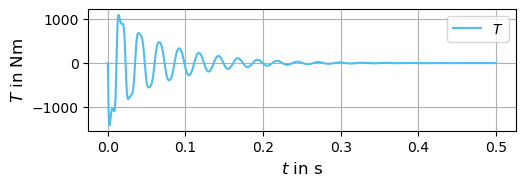

In [7]:
savePlot = False

## i_dq
fig1,axs1 = plt.subplots(1,1,figsize=(14*cm,4*cm))
axs1.plot(t,i_d,label=r'$i_{\mathrm{d}}$',color=blue)
axs1.plot(t,i_q,label=r'$i_{\mathrm{q}}$',color=green)
axs1.legend(loc='upper right',ncols=2)
axs1.grid(True)
axs1.set_ylabel(r'$i_{\mathrm{dq}}$ in A',fontsize=12)
axs1.set_xlabel(r'$t$ in s',fontsize=12)

## i_f
fig2,axs2 = plt.subplots(1,1,figsize=(14*cm,4*cm))
axs2.plot(t,i_f,label=r'$i_{\mathrm{f}}$',color=red)
axs2.legend(loc='best',ncols=2)
axs2.grid(True)
axs2.set_ylabel(r'$i_{\mathrm{f}}$ in A',fontsize=12)
axs2.set_xlabel(r'$t$ in s',fontsize=12)

# omega
fig4,axs4 = plt.subplots(1,1,figsize=(14*cm,4*cm))
axs4.plot(t,omega,label=r'$\omega_{\mathrm{r,el}}$',color=purple)
axs4.grid(True)
axs4.legend(loc='best',ncols=2)
axs4.set_ylabel(r'$\omega$ in 1/s',fontsize=12)
axs4.set_xlabel(r'$t$ in s',fontsize=12)
axs4.set_ylim(-700,700)

# torque
fig6,axs6 = plt.subplots(1,1,figsize=(14*cm,4*cm))
axs6.plot(t,T,label=r'$T$',color=lblue)
axs6.grid(True)
axs6.legend(loc='upper right',ncols=2)
axs6.set_ylabel(r'$T$ in Nm',fontsize=12)
axs6.set_xlabel(r'$t$ in s',fontsize=12)


if savePlot:
     fig1.savefig('C:/Git/EMD_Course/exercise/fig/ex06/i_dq_dampingW_ode.pdf',bbox_inches='tight')
     fig2.savefig('C:/Git/EMD_Course/exercise/fig/ex06/i_f_dampingW_ode.pdf',bbox_inches='tight')
     fig4.savefig('C:/Git/EMD_Course/exercise/fig/ex06/omega_r_el_dampingW_ode.pdf',bbox_inches='tight')
     fig6.savefig('C:/Git/EMD_Course/exercise/fig/ex06/T_dampingW_ode.pdf',bbox_inches='tight')
else:
     print('Nothing to save.')